In [46]:
# Initialize Otter
import otter
grader = otter.Notebook("lab10A.ipynb")

---

<h3><center>E7 -  Introduction to Programming for Scientists and Engineers</center></h3>

<h2><center>Lab session #10-A <br></center></h2>

<h1><center>Matrix operations<br></center></h1>

---

In [47]:
from resources.hashutils import *
import numpy as np
import matplotlib.pyplot as plt

# Question 1: Matrix multiplication with Python

Use NumPy's `@` operator (which is a shorthand for the [matmul](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html) function) to find the product $AB$ of the following two matrices:

$$A = \begin{bmatrix}0&1\\2&-1\end{bmatrix}$$
$$B = \begin{bmatrix}4&0&-1\\1&3&1\end{bmatrix}$$

Store the result as `Z`.

In [48]:
A = np.array([[0,1],[2,-1]])
B = np.array([[4,0,-1],[1,3,1]])
Z = A@B

In [49]:
grader.check("q1p1")

q1p1 results: All test cases passed!

# Question 2: Isometric projection

In this part we will compute the *isometric projection* that was covered in lecture. To recap, the isometric projection can be broken down into three steps. We begin with a coordinate frame $(x,y,z)$, and with the viewer located on the $x$ axis, and looking toward the origin. The three steps are then:
1. Rotate the scene by $\beta=45\degree$ on the $z$ axis. This produces a new coordinate frame $(x',y',z')$.
2. Rotate the scene by $\alpha=\text{atan}(1/\sqrt{2})$ on the $y'$ axis. This produces a new coordinate frame $(x'',y'',z'')$.
3. Relabel the coordinates: $x'''=y''$ and $y'''=z''$. Discard the $x''$ coordinate. 

All three of these steps are linear transformations, and can therefore be computed with matrix multiplications. In what follows we will execute the three steps in order. 

## Question 2.1: Load the point cloud of 3D points

The data consists of a cloud of points in space taken from the surface of an object. The data is stored in the file `pointcloud.npy`. Use NumPy's [load](https://numpy.org/doc/stable/reference/generated/numpy.load.html) method to load the data into a variable named `pointcloud`. 

Inspect the array to obtain the number of points in the cloud. Store this quantity as `numpoints`.

**Note**
+ The three rows in `pointcloud` are respectively the $x$, $y$, and $z$ coordinates of each point.

In [50]:
pointcloud = np.load("pointcloud.npy")
numpoints = pointcloud.shape[1]

In [51]:
grader.check("q2p1")

q2p1 results: All test cases passed!

## Question 2.2: Plot the point cloud in 3D

Create a function called `plot_pc_3d` that takes a point cloud array as input (e.g. `pointcloud`) and produces a 3D scatter plot. The plot should have these characteristics:
+ `figsize=(6,6)`
+ For the scatter plot use a `'.'` of size 5 as the marker. 
+ Add a size 40 magenta-colored `'o'` marker at the origin (again using `scatter`)
+ Label the $x$, $y$, and $z$ axes with `'x'`, `'y'`, and, `'z'` respectively. 
+ The last line in the template (`ax.set_aspect('equal')`) gives equal aspect ratios to all three coordinates. This gives the scatter plot a realistic look. 

**Notes**:
+ The three rows in `pointcloud` are respectively the $x$, $y$, and $z$ coordinates of each point.
+ The function should return the `fig` and `ax` objects.
+ Applied to `pointcloud`, the plot should look like this:

<img src="resources/airplane1.png" width="400" />

+ Try adding `%matplotlib widget` to the cell that calls `plot_pc_3d(pointcloud)`. This will render the plot in a widget where you can rotate it with your mouse. But don't forget to remove this line before submitting, or else Gradescope's autograder will fail. 
 

In [52]:
def plot_pc_3d(pts):
    x = pts[0,:]
    y = pts[1,:]
    z = pts[2,:]
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(projection = '3d')
    ax.scatter(x,y,z,marker = '.', s = 5)
    ax.scatter(0,0,0,marker = 'o',c='magenta',s = 40)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_aspect('equal')
    return fig, ax

(<Figure size 600x600 with 1 Axes>,
 <Axes3D: xlabel='x', ylabel='y', zlabel='z'>)

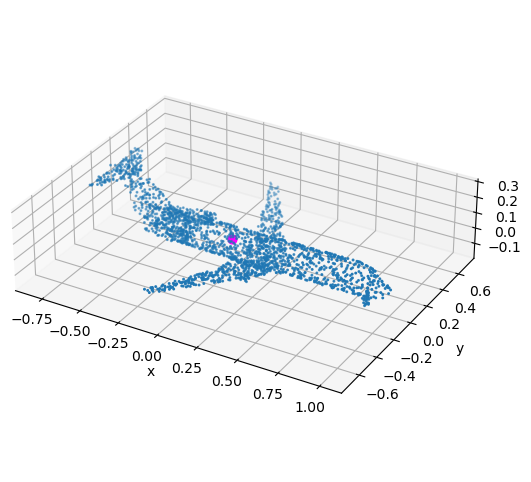

In [53]:
plot_pc_3d(pointcloud)

In [54]:
grader.check("q2p2")

q2p2 results: All test cases passed!

## Question 2.3 : Initial view

As mentioned earlier, the viewer is initially located on the positive $x$ axis, looking toward the origin. Their perspective is obtained by projecting the points onto the $yz$ plane. Create a function called `viewer_perspective` that plots this persepective. That is, the $y$ coordinate of each point should be plotted along the horizontal axis, and the $z$ coordinate on the vertical axis. Here are the specifications for the plot:

+ This is a 2D plot
+ `figsize=(6,6)`
+ Same marker as in Question 2.2
+ Again add a margent-colored `'o'` at the origin. 
+ Label the horizontal axis with `'y'` and the vertical axis with `'z'`.
+ Again use `ax.set_aspect('equal')`.
+ Return `fig, ax`
+ The plot should look like this:

<img src="resources/airplane2.png" width="400" />


In [55]:
def viewer_perspective(pts):
    fig, ax = plt.subplots(figsize=(6,6))
    x = pts[1,:]
    y = pts[2,:]
    ax.scatter(x,y,marker = '.', s = 5)
    ax.scatter(0,0,marker = 'o',c='magenta',s = 40)
    ax.set_xlabel('y')
    ax.set_ylabel('x')
    ax.set_aspect('equal')
    return fig, ax

(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='y', ylabel='x'>)

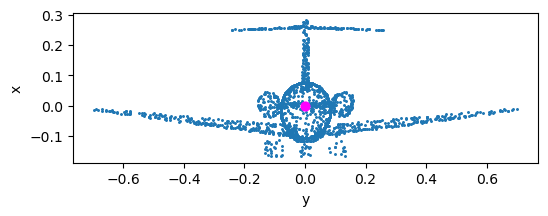

In [56]:
viewer_perspective(pointcloud)

In [57]:
grader.check("q2p3")

q2p3 results: All test cases passed!

## Question 2.4: $45\degree$ rotation about $z$

Step one in the process is to rotate the view $45\degree$ about the $z$ axis. This is a linear transformation from the $(x,y,z)$ coordinate frame to $(x',y',z')$, and it can be computed by multiplying each point by the matrix:
$$R1 = \begin{bmatrix} 
1/\sqrt{2} & 1/\sqrt{2}  & 0 \\ 
-1/\sqrt{2} & 1/\sqrt{2}  & 0 \\ 
0 & 0 & 1 \end{bmatrix} $$

Write a function called `doR1` that takes a `(3,numpoints)` shaped array as input, applies the $45\degree$ rotation to each point (by multiplying each one by $R1$), and returns the transformed point cloud (also shape `(3,numpoints)`). 

Use this function to compute a rotated point cloud:
```python 
pc1 = doR1(pointcloud)
```
And use `viewer_perspective(pc1)` to visualize the perspective of a viewer located on the rotated $x'$ axis. 

In [60]:
def doR1(pts):
    R1 = np.array([[1/np.sqrt(2),1/np.sqrt(2),0],
                   [-1/np.sqrt(2),1/np.sqrt(2),0],
                   [0,0,1]])
    rabtz = R1@pts
    return rabtz

(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='y', ylabel='x'>)

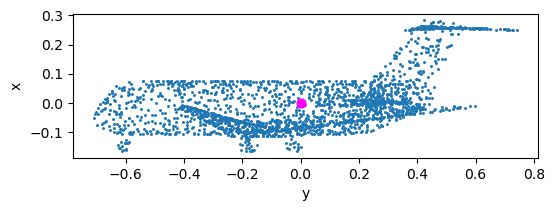

In [61]:
pc1 = doR1(pointcloud)
viewer_perspective(pc1)

In [62]:
grader.check("q2p4")

q2p4 results: All test cases passed!

## Question 2.5: Rotation about $y'$

The second step is to rotate the $(x',y',z')$ coordinate frame by $\alpha=\text{atan}(1/\sqrt{2})$ radians about the $y'$ axis. This is accomplished by multiplying each point in `pc1` by
$$R2 = \begin{bmatrix} 
\cos(\alpha) & 0 & \sin(\alpha) \\ 
0 & 1 & 0 \\ 
-\sin(\alpha) & 0 & \cos(\alpha) \end{bmatrix} $$

Write a function called `doR2` that transforms a point cloud from $(x',y',z')$ coordinates to $(x'',y'',z'')$ coordinates by multiplying each point by $R2$. The input and return values should be arrays of shape `(3,numpoint)`.

Then apply this transformation to `pc1` to obtain `pc2`, the point cloud after two rotations. Plotting `pc2` with  `viewer_perspective` produces the so-called "isometric projection" shown below.

<img src="resources/airplane3.png" width="400" />


In [74]:
def doR2(pts):
    alpha = np.arctan(1/np.sqrt(2))
    R2 = np.array([[np.cos(alpha),0,np.sin(alpha)],
                   [0,1,0],
                   [-np.sin(alpha),0,np.cos(alpha)]])
    rabty = R2@pc1
    return rabty

(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='y', ylabel='x'>)

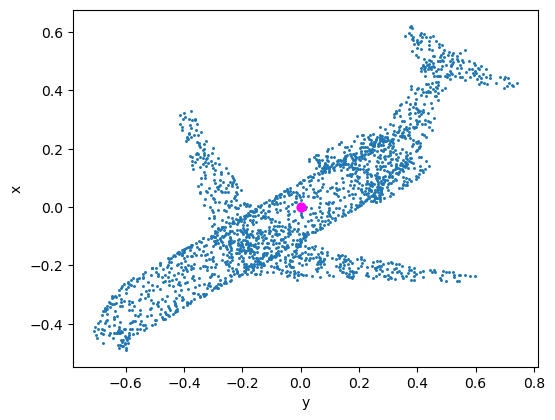

In [75]:
pc2 = doR2(pc1)
viewer_perspective(pc2)

In [76]:
grader.check("q2p5")

q2p5 results: All test cases passed!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [77]:
grader.check_all()

q1p1 results: All test cases passed!

q2p1 results: All test cases passed!

q2p2 results: All test cases passed!

q2p3 results: All test cases passed!

q2p4 results: All test cases passed!

q2p5 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Make sure you submit the .zip file to Gradescope.

In [78]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)